# USE CASE: MNIST, ANN

We have been given a use case on MNIST data. We load the dataset using keras library and print the dimensions of the data. We split the data into train and test data and create an mlp classifier using the sklearn library. The model gives an accuracy of 96 %. We then change the activation function, solver, learning rate and hidden layers to check the accuracy. We carry out validation on a set of hyperparameters.

In [1]:
# import the dataset

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (13,13)
plt.style.use('ggplot')
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

/opt/usr/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# Dimesions of the dataset

In [5]:
x_train[:][:][:].shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_test[:][:][:].shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [9]:
y_train.max()

9

In [10]:
y_train.min()

0

In [11]:
y_test.max()

9

In [12]:
y_test.min()

0

In [13]:
# Reshape the dataset

In [14]:
X1 = x_train.reshape(60000,-1)

In [15]:
X1.shape

(60000, 784)

In [16]:
X2 = x_test.reshape(10000,-1)

In [17]:
X2.shape

(10000, 784)

# ARTIFICIAL NEURAL NETWORKS

In [18]:
# Select 1 layer with 100 neurons

In [19]:
mlp = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto',max_iter = 200, solver = 'adam',hidden_layer_sizes=(100))

In [20]:
# Fit the data

In [21]:
mlp.fit(X1, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [22]:
# perform predictions

In [23]:
predictions = mlp.predict(X2)
print(confusion_matrix(y_test,predictions))

[[ 964    1    0    1    0    2    6    1    4    1]
 [   0 1104    2    4    1    1    1    2   20    0]
 [   7    1  982   16    4    0    2    9   10    1]
 [   1    2    4  958    2   19    0    4   15    5]
 [   0    0    6    1  934    0    7    3    2   29]
 [   4    0    1   16    1  835    7    2   17    9]
 [   7    2    2    0    5   18  914    1    9    0]
 [   1    2   11    7    4    0    1  981    6   15]
 [   7    2    3    7    1    6    2    3  938    5]
 [   7    3    0    7   15    1    0    6    7  963]]


In [24]:
# Print classification report

In [25]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97       980
          1       0.99      0.97      0.98      1135
          2       0.97      0.95      0.96      1032
          3       0.94      0.95      0.95      1010
          4       0.97      0.95      0.96       982
          5       0.95      0.94      0.94       892
          6       0.97      0.95      0.96       958
          7       0.97      0.95      0.96      1028
          8       0.91      0.96      0.94       974
          9       0.94      0.95      0.95      1009

avg / total       0.96      0.96      0.96     10000



In [26]:
# Confusion matrix plot

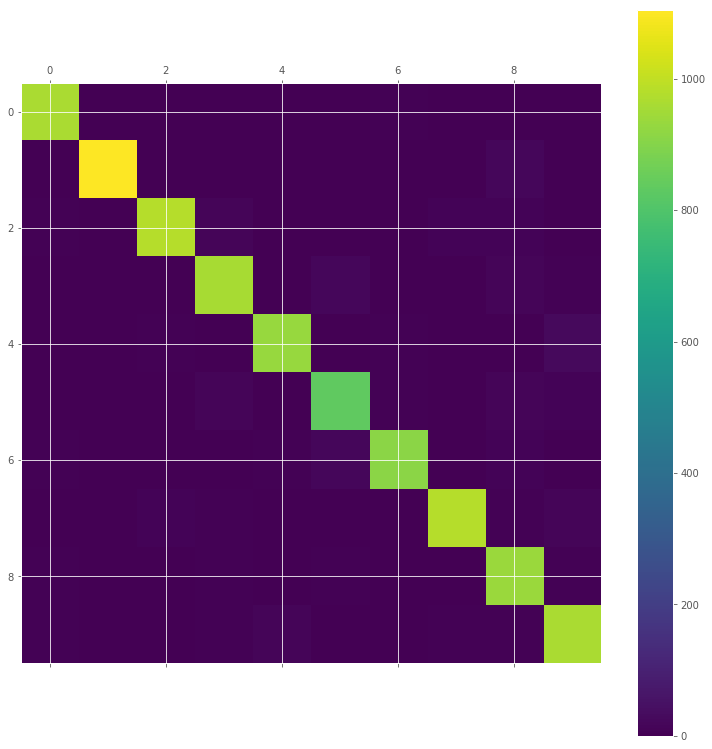

In [29]:
cm = confusion_matrix(y_test, predictions)
plt.matshow(cm)
plt.colorbar()

# 3. CHANGE ACTIVATION FUNCTION, SOLVER, LEARNING RATE AND HIDDEN LAYERS OF THE MLP CLASSIFIER

In [30]:
mlp2 = MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',learning_rate = 'adaptive', max_iter = 200, solver = 'sgd',hidden_layer_sizes=(100,50))

/opt/usr/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[ 964    0    0    0    0    4    5    3    4    0]
 [   0 1122    2    3    0    1    3    1    3    0]
 [   8    1  986    3    7    0    5    8   12    2]
 [   1    1   12  967    0   13    0    8    4    4]
 [   1    0    5    0  941    0    8    1    3   23]
 [   7    1    3   19    2  832   10    3    9    6]
 [  10    4    2    0    7   10  923    0    2    0]
 [   3    9   20    6    4    0    0  974    0   12]
 [   5    3    7   15    4   11    8    9  909    3]
 [   6    6    0    6   14   11    2   10    4  950]]
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       980
          1       0.98      0.99      0.98      1135
          2       0.95      0.96      0.95      1032
          3       0.95      0.96      0.95      1010
          4       0.96      0.96      0.96       982
          5       0.94      0.93      0.94       892
          6       0.96      0.96      0.96       958
          7       0.96      0.95      0.95  

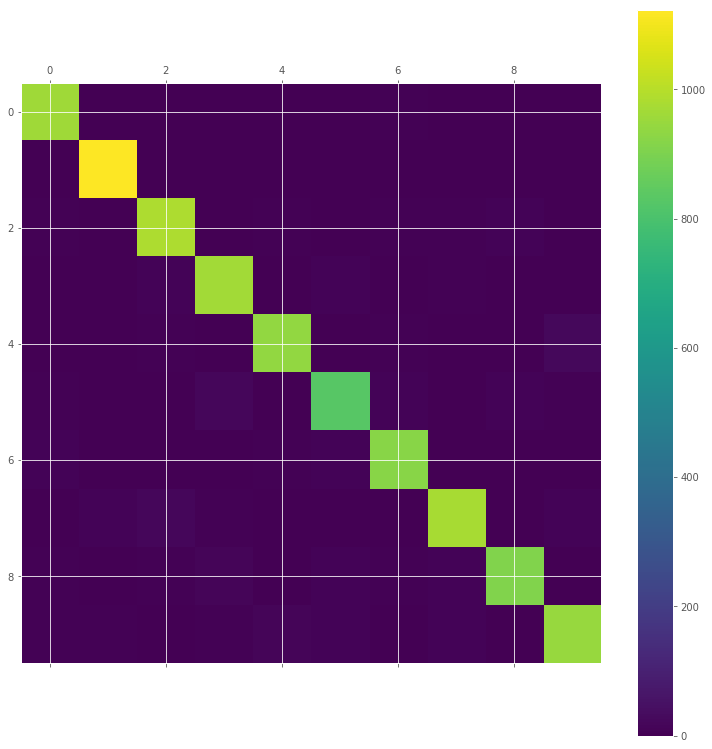

In [31]:
# Fit the data
mlp2.fit(X1, y_train)
# perform predictions
predictions2 = mlp2.predict(X2)
print(confusion_matrix(y_test,predictions2))
# Print classification report
print(classification_report(y_test,predictions2))
# Confusion matrix plot
cm = confusion_matrix(y_test, predictions2)
plt.matshow(cm)
plt.colorbar()

# 4. CROSS - VALIDATION ON A SET OF HYPERPARAMETERS

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto',max_iter = 200, solver = 'adam',hidden_layer_sizes=(100))
results = cross_val_score(model, X1, y_train, cv=kfold)
print(results.mean()*100.0, results.std()*100.0)

95.23000000000002 0.5057887130237497


# 5. ERROR vs ITERATION GRAPH

In [43]:
mlp3 = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto',max_iter = 20, solver = 'adam',hidden_layer_sizes=(50),verbose = True)

In [61]:
history = mlp3.fit(X1,y_train)

Iteration 1, loss = 2.68744136
Iteration 2, loss = 0.87627432
Iteration 3, loss = 0.64570199
Iteration 4, loss = 0.52614480
Iteration 5, loss = 0.44586002
Iteration 6, loss = 0.39144945
Iteration 7, loss = 0.35312888
Iteration 8, loss = 0.31510848
Iteration 9, loss = 0.28152524
Iteration 10, loss = 0.25971161
Iteration 11, loss = 0.24197343
Iteration 12, loss = 0.22658014
Iteration 13, loss = 0.21728229
Iteration 14, loss = 0.20514013
Iteration 15, loss = 0.19885408
Iteration 16, loss = 0.19115773
Iteration 17, loss = 0.19053906
Iteration 18, loss = 0.18003548
Iteration 19, loss = 0.17102665
Iteration 20, loss = 0.17207883


/opt/usr/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [62]:
history.loss_

0.17207883279836342